In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv",low_memory=False)
mask_cod= df["payment_method"] == "cod"
mask_stat_net= df["BI Status"] == "Net"
mask_stat_gross= df["BI Status"] == "Gross"
df =df[mask_cod & (mask_stat_net | mask_stat_gross)]

In [3]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
5,211137.0,canceled,7/1/2016,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,6.0,NaN,NaN,NaN,NaN,NaN
6,211138.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147449,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
dropcol= ['item_id', 'status',  'sku', 
        'increment_id',
        'payment_method', "M-Y",
       'Working Date', 'Year',  'Customer Since',
        'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',"sales_commission_code",
       'Unnamed: 24', 'Unnamed: 25']


In [5]:
df.drop(columns=dropcol ,inplace = True)

In [6]:
df.head()

,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,BI Status,MV,Month
1,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,0.0,Gross,240,7.0
2,7/1/2016,2450.0,1.0,2450.0,Women's Fashion,0.0,Gross,"2,450",7.0
3,7/1/2016,360.0,1.0,60.0,Beauty & Grooming,300.0,Net,360,7.0
5,7/1/2016,80.0,1.0,80.0,Soghaat,0.0,Gross,80,7.0
6,7/1/2016,360.0,1.0,60.0,Beauty & Grooming,300.0,Net,360,7.0


In [7]:
df["status"]=df["BI Status"] 
df.drop(columns="BI Status",inplace =True)

In [8]:
df.head()

,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,MV,Month,status
1,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,0.0,240,7.0,Gross
2,7/1/2016,2450.0,1.0,2450.0,Women's Fashion,0.0,"2,450",7.0,Gross
3,7/1/2016,360.0,1.0,60.0,Beauty & Grooming,300.0,360,7.0,Net
5,7/1/2016,80.0,1.0,80.0,Soghaat,0.0,80,7.0,Gross
6,7/1/2016,360.0,1.0,60.0,Beauty & Grooming,300.0,360,7.0,Net


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170202 entries, 1 to 584496
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_at       170202 non-null  object 
 1   price            170202 non-null  float64
 2   qty_ordered      170202 non-null  float64
 3   grand_total      170202 non-null  float64
 4   category_name_1  170101 non-null  object 
 5   discount_amount  170202 non-null  float64
 6    MV              170202 non-null  object 
 7   Month            170202 non-null  float64
 8   status           170202 non-null  object 
dtypes: float64(5), object(4)
memory usage: 13.0+ MB


In [10]:
df.columns = df.columns.str.strip()


In [11]:
df['MV'] = pd.to_numeric(df['MV'], errors='coerce')

In [12]:
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

In [13]:
df["date"]=df["created_at"].str[0].astype("int")
df.drop(columns="created_at",inplace =True)

In [14]:
df["MV"].isnull().mean() * 100

np.float64(35.43084100069329)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170202 entries, 1 to 584496
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            170202 non-null  float64
 1   qty_ordered      170202 non-null  float64
 2   grand_total      170202 non-null  float64
 3   category_name_1  170101 non-null  object 
 4   discount_amount  170202 non-null  float64
 5   MV               109898 non-null  float64
 6   Month            170202 non-null  float64
 7   status           170202 non-null  object 
 8   date             170202 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 13.0+ MB


In [16]:
df = df.drop(columns=['MV'])

In [17]:
df.tail()

,price,qty_ordered,grand_total,category_name_1,discount_amount,Month,status,date
584436,235.0,1.0,1484.0,Health & Sports,0.0,8.0,Gross,8
584447,3300.0,1.0,3550.0,Mobiles & Tablets,0.0,8.0,Gross,8
584455,5499.0,1.0,5749.0,Home & Living,0.0,8.0,Gross,8
584491,44459.0,1.0,44759.0,Mobiles & Tablets,0.0,8.0,Gross,8
584496,1048.0,1.0,1298.0,Men's Fashion,0.0,8.0,Gross,8


In [18]:
d=["discount_amount","grand_total"]

In [19]:
df.drop(columns=d , inplace = True )

In [20]:
target = 'status'
X = df.drop(columns=[target])
y=df[target]

In [21]:
df.head()

,price,qty_ordered,category_name_1,Month,status,date
1,240.0,1.0,Beauty & Grooming,7.0,Gross,7
2,2450.0,1.0,Women's Fashion,7.0,Gross,7
3,360.0,1.0,Beauty & Grooming,7.0,Net,7
5,80.0,1.0,Soghaat,7.0,Gross,7
6,360.0,1.0,Beauty & Grooming,7.0,Net,7


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
df['status'] = df['status'].map({'Net': 0, 'Gross': 1})

''

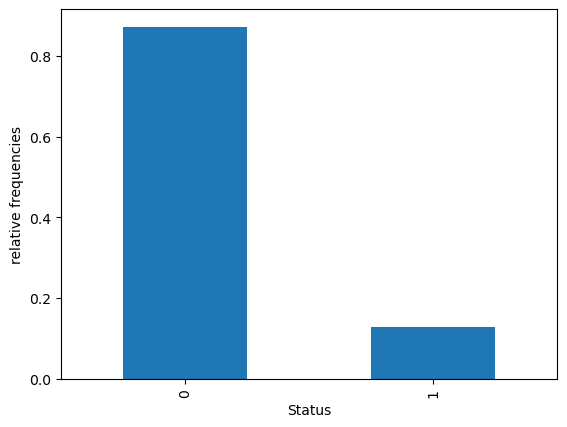

In [24]:
df["status"].value_counts(normalize=True).plot(kind = 'bar',xlabel = "Status",ylabel = "relative frequencies"
                                                     ,title ="")
;

In [25]:
acc_baseline = df['status'].value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.87


In [26]:
num_features = ['price', 'qty_ordered', 'Month','date']
cat_features = ['category_name_1']

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_features),
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OrdinalEncoder()
        ), cat_features)
    ])

In [28]:
model = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42)
)

In [29]:
param_grid = {
    'decisiontreeclassifier__max_depth': range(1, 26),
    'decisiontreeclassifier__min_samples_leaf': [1, 5, 10, 20]
}


model_tuned = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

model_tuned.fit(X_train, y_train)

print("Best Depth:", model_tuned.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Depth: {'decisiontreeclassifier__max_depth': 11, 'decisiontreeclassifier__min_samples_leaf': 10}


In [30]:
final_score = model_tuned.score(X_test, y_test)
print(f"Final Test Accuracy: {final_score}")

Final Test Accuracy: 0.8900443582738462


In [31]:
y_pred = model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Gross       0.68      0.22      0.34      4253
         Net       0.90      0.99      0.94     29788

    accuracy                           0.89     34041
   macro avg       0.79      0.60      0.64     34041
weighted avg       0.87      0.89      0.86     34041



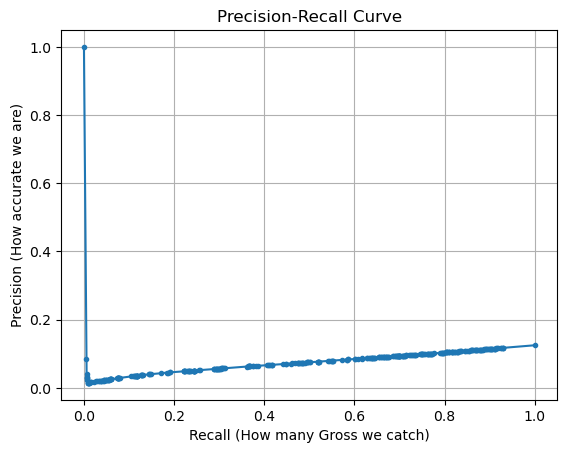

In [32]:
from sklearn.metrics import precision_recall_curve
y_proba = model_tuned.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label="Gross")

# Plot it
import matplotlib.pyplot as plt
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall (How many Gross we catch)')
plt.ylabel('Precision (How accurate we are)')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

Class Order: ['Gross' 'Net']


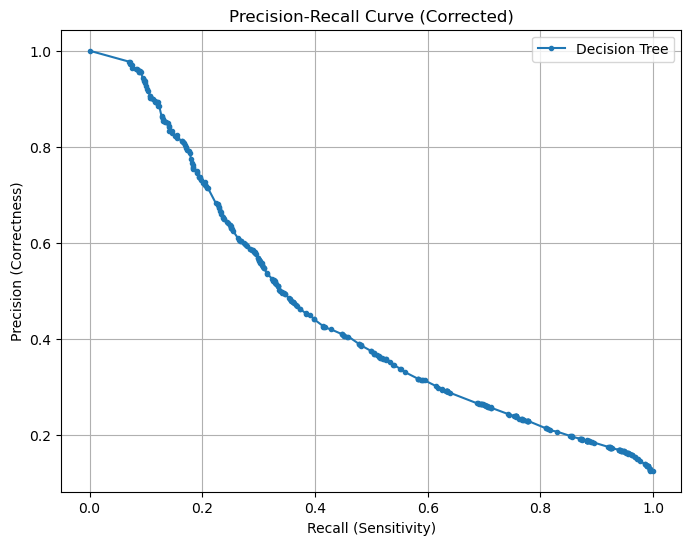

In [33]:

print("Class Order:", model_tuned.classes_) 



y_proba_gross = model_tuned.predict_proba(X_test)[:, 0]


precision, recall, thresholds = precision_recall_curve(y_test, y_proba_gross, pos_label="Gross")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Decision Tree')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (Correctness)')
plt.title('Precision-Recall Curve (Corrected)')
plt.legend()
plt.grid()
plt.show()

In [34]:
y_proba_gross = model_tuned.predict_proba(X_test)[:, 0]
threshold = 0.20  
y_pred_custom = (y_proba_gross >= threshold)
y_pred_custom = pd.Series(y_pred_custom).map({True: 'Gross', False: 'Net'})
print(f"--- Results with Threshold {threshold} ---")
print(classification_report(y_test, y_pred_custom))

--- Results with Threshold 0.2 ---
              precision    recall  f1-score   support

       Gross       0.37      0.50      0.43      4253
         Net       0.93      0.88      0.90     29788

    accuracy                           0.83     34041
   macro avg       0.65      0.69      0.66     34041
weighted avg       0.86      0.83      0.84     34041



In [35]:
best_pipe = model_tuned.best_estimator_


In [36]:
preprocessor = model_tuned.best_estimator_.steps[0][1]
raw_names = preprocessor.get_feature_names_out()


In [37]:
clean_names = []
for name in raw_names:
    
    clean_name = name.split('__')[-1]
    if clean_name == '0':
        
        clean_name = 'category_name_1'
    clean_names.append(clean_name)

In [38]:
importances = model_tuned.best_estimator_.steps[-1][1].feature_importances_
feat_imp = pd.DataFrame({'feature': clean_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=True)

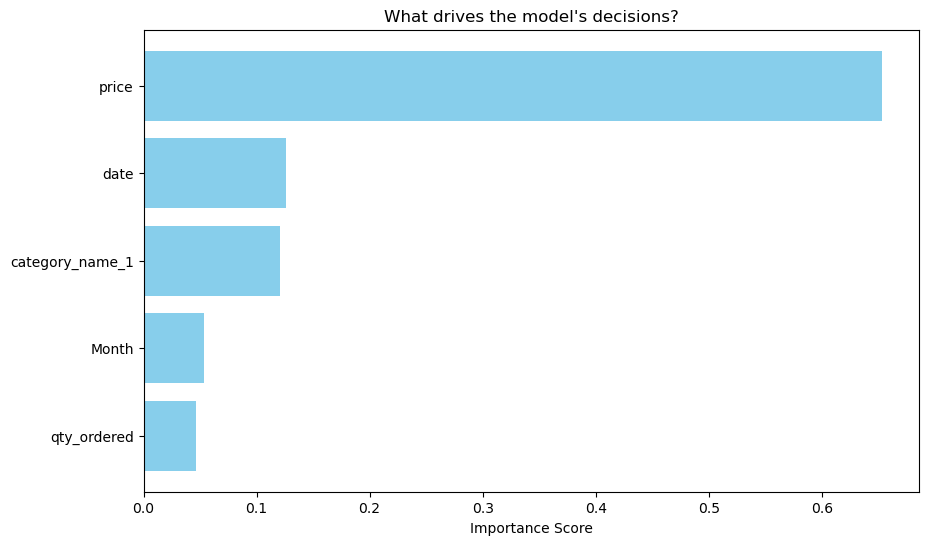

In [39]:
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['feature'], feat_imp['importance'], color='skyblue')
plt.title("What drives the model's decisions?")
plt.xlabel("Importance Score")
plt.show()

In [40]:
import joblib
best_model = model_tuned.best_estimator_
joblib.dump(best_model, "Daraz.pkl")


['Daraz.pkl']